In [221]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os
import re

# Demographic Metric

### Race data

In [222]:
# Specify the directory where your files are located
directory_path = r"C:\Users\jabba\Desktop\Code\machine_learning\AUC_mastercard_challenge\src\demographic"

# Specify the file pattern
file_pattern = os.path.join(directory_path, 'acs_race_*.csv')

# Use glob to find all files matching the pattern
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through each file, read it into a DataFrame, and append it to the list
for file in file_list:
    try:
        df = pd.read_csv(file)

        # Add a year column based on the file name
        year = os.path.basename(file).split('_')[-1].split('.')[0]
        df['Year'] = year

        # Check if the year is 2022 and rename columns accordingly
        if year == '2022':
            df.rename(columns={
                'Label (Grouping)': 'Demographic Group',
                'Census Tract 4052; Alameda County; California!!Estimate': 'Census Tract 4052 Estimate',
                'Census Tract 4053.01; Alameda County; California!!Estimate': 'Census Tract 4053.01 Estimate',
                'Census Tract 4053.02; Alameda County; California!!Estimate': 'Census Tract 4053.02 Estimate',
                'Census Tract 4054.01; Alameda County; California!!Estimate': 'Census Tract 4054.01 Estimate',
                'Census Tract 4054.02; Alameda County; California!!Estimate': 'Census Tract 4054.02 Estimate',
                'Census Tract 4055; Alameda County; California!!Estimate': 'Census Tract 4055 Estimate',
                'Census Tract 4056; Alameda County; California!!Estimate': 'Census Tract 4056 Estimate',
                'Census Tract 4057; Alameda County; California!!Estimate': 'Census Tract 4057 Estimate',
                'Census Tract 4058; Alameda County; California!!Estimate': 'Census Tract 4058 Estimate',
                'Census Tract 4059.01; Alameda County; California!!Estimate': 'Census Tract 4059.01 Estimate',
                'Census Tract 4059.02; Alameda County; California!!Estimate': 'Census Tract 4059.02 Estimate',
                'Census Tract 4060; Alameda County; California!!Estimate': 'Census Tract 4060 Estimate',
                'Year': 'Estimate Year'
            }, inplace=True)
        else:
            # For other years, rename using the standard format (with commas)
            df.rename(columns={
                'Label (Grouping)': 'Demographic Group',
                'Census Tract 4052, Alameda County, California!!Estimate': 'Census Tract 4052 Estimate',
                'Census Tract 4053.01, Alameda County, California!!Estimate': 'Census Tract 4053.01 Estimate',
                'Census Tract 4053.02, Alameda County, California!!Estimate': 'Census Tract 4053.02 Estimate',
                'Census Tract 4054.01, Alameda County, California!!Estimate': 'Census Tract 4054.01 Estimate',
                'Census Tract 4054.02, Alameda County, California!!Estimate': 'Census Tract 4054.02 Estimate',
                'Census Tract 4055, Alameda County, California!!Estimate': 'Census Tract 4055 Estimate',
                'Census Tract 4056, Alameda County, California!!Estimate': 'Census Tract 4056 Estimate',
                'Census Tract 4057, Alameda County, California!!Estimate': 'Census Tract 4057 Estimate',
                'Census Tract 4058, Alameda County, California!!Estimate': 'Census Tract 4058 Estimate',
                'Census Tract 4059.01, Alameda County, California!!Estimate': 'Census Tract 4059.01 Estimate',
                'Census Tract 4059.02, Alameda County, California!!Estimate': 'Census Tract 4059.02 Estimate',
                'Census Tract 4060, Alameda County, California!!Estimate': 'Census Tract 4060 Estimate',
                'Year': 'Estimate Year'
            }, inplace=True)

        # Append the modified DataFrame to the list
        dataframes.append(df)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames into a single DataFrame
merged_race_df = pd.concat(dataframes, ignore_index=True)

# Move 'Year' to the front
column_order = ['Estimate Year'] + [col for col in merged_race_df.columns if col != 'Estimate Year']
merged_race_df = merged_race_df[column_order]

# Save the merged DataFrame to a new CSV file
merged_race_df.to_csv('merged_acs_race_data.csv', index=False)

excel_file_path = r"C:\Users\jabba\Desktop\Code\merged_race.xlsx" 
df.to_excel(excel_file_path, index=False) 

# Display the modified DataFrame
merged_race_df.head(10)


,Estimate Year,Demographic Group,Census Tract 4052 Estimate,Census Tract 4053.01 Estimate,Census Tract 4053.02 Estimate,Census Tract 4054.01 Estimate,Census Tract 4054.02 Estimate,Census Tract 4055 Estimate,Census Tract 4056 Estimate,Census Tract 4057 Estimate,Census Tract 4058 Estimate,Census Tract 4059.01 Estimate,Census Tract 4059.02 Estimate,Census Tract 4060 Estimate
0,2017,Total:,"5,125","3,019","2,446","4,014","3,250","4,124","3,171","3,760","4,472","4,583","3,101","3,184"
1,2017,White alone,"1,930","1,552",885,"1,061",404,"1,152","1,221",814,"1,008",692,590,837
2,2017,Black or African American alone,711,757,367,806,841,585,482,"1,229","1,053",815,436,435
3,2017,American Indian and Alaska Native alone,58,7,16,87,68,14,110,9,54,185,31,33
4,2017,Asian alone,"1,519",275,848,"1,362","1,117","2,051",875,"1,179","1,918","1,652","1,480","1,377"
5,2017,Native Hawaiian and Other Pacific Islander...,68,7,0,0,219,6,0,0,25,0,56,7
6,2017,Some other race alone,282,201,134,508,447,51,237,354,223,"1,201",407,342
7,2017,Two or more races:,557,220,196,190,154,265,246,175,191,38,101,153
8,2017,Two races including Some other race,122,24,11,27,20,50,96,4,94,38,37,10
9,2017,"Two races excluding Some other race, a...",435,196,185,163,134,215,150,171,97,0,64,143


### Age and Sex data

In [225]:
# Specify the directory where your files are located
directory_path = r"C:\Users\jabba\Desktop\Code\machine_learning\AUC_mastercard_challenge\src\demographic"

# Specify the file pattern
file_pattern = os.path.join(directory_path, 'acs_age_sex*.csv')

# Use glob to find all files matching the pattern
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold the DataFrames
dataframes = []

# Specify age groups to drop
age_groups_to_drop = ['AGE', 'SUMMARY INDICATORS', 'Sex ratio (males per 100 females)', 
                      'PERCENT ALLOCATED', 'Sex', 'Age', 'SELECTED AGE CATEGORIES', '5 to 14 years','15 to 17 years', 'Under 18 years',
                     '18 to 24 years', '15 to 44 years', '16 years and over', '18 years and over', '21 years and over', '60 years and over',
                     '62 years and over', '65 years and over', '75 years and over']

# Loop through each file, read it into a DataFrame, and append it to the list
for file in file_list:
    try:
        df = pd.read_csv(file)

        # Add a year column based on the file name
        year = os.path.basename(file).split('_')[-1].split('.')[0]
        df['Year'] = year

        # Normalize age group names and drop rows based on specified age groups
        df['Label (Grouping)'] = df['Label (Grouping)'].str.strip()  # Remove leading/trailing whitespace
        df = df[~df['Label (Grouping)'].isin(age_groups_to_drop)]

        # Rename columns for estimate year
        df.rename(columns={
            'Label (Grouping)': 'Age Group',
            'Year': 'Estimate Year'  # Corrected the empty string issue
        }, inplace=True)

        # Identify and rename columns that have 'Total', 'Male', 'Female'
        new_column_names = {}
        columns_to_drop = []

        for col in df.columns:
            # Check for percentage columns
            if 'Percent' in col:
                columns_to_drop.append(col)
                continue

            # Match pattern and extract tract number and type (Total, Male, Female)
            match = re.search(r'Census Tract ([\d.]+)[,;].*!!(Total|Male|Female)!!Estimate', col)
            if match:
                tract_number = match.group(1).replace('.', '')  # Clean tract number
                gender = match.group(2)
                new_column_name = f'Total Estimate for Tract {tract_number}' if gender == 'Total' else f'{gender} Estimate for Tract {tract_number}'
                new_column_names[col] = new_column_name

        # Rename the columns
        df.rename(columns=new_column_names, inplace=True)

        # Drop columns that contain percentages
        df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

        # Append the modified DataFrame to the list
        dataframes.append(df)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames into a single DataFrame
merged_age_sex_df = pd.concat(dataframes, ignore_index=True)

# Move 'Year' to the front
column_order = ['Estimate Year'] + [col for col in merged_age_sex_df.columns if col != 'Estimate Year']
merged_age_sex_df = merged_race_df[column_order]

# Save the merged DataFrame to a new CSV file
merged_age_sex_df.to_csv('merged_acs_age_sex_data.csv', index=False)


excel_file_path = r"C:\Users\jabba\Desktop\Code\merged_age_sex.xlsx" 
df.to_excel(excel_file_path, index=False) 

# Display the modified DataFrame
merged_age_sex_df.head(25)


,Estimate Year,Age Group,Total Estimate for Tract 4052,Male Estimate for Tract 4052,Female Estimate for Tract 4052,Total Estimate for Tract 405301,Male Estimate for Tract 405301,Female Estimate for Tract 405301,Total Estimate for Tract 405302,Male Estimate for Tract 405302,Female Estimate for Tract 405302,Total Estimate for Tract 405401,Male Estimate for Tract 405401,Female Estimate for Tract 405401,Total Estimate for Tract 405402,Male Estimate for Tract 405402,Female Estimate for Tract 405402,Total Estimate for Tract 4055,Male Estimate for Tract 4055,Female Estimate for Tract 4055,Total Estimate for Tract 4056,Male Estimate for Tract 4056,Female Estimate for Tract 4056,Total Estimate for Tract 4057,Male Estimate for Tract 4057,Female Estimate for Tract 4057,Total Estimate for Tract 4058,Male Estimate for Tract 4058,Female Estimate for Tract 4058,Total Estimate for Tract 405901,Male Estimate for Tract 405901,Female Estimate for Tract 405901,Total Estimate for Tract 405902,Male Estimate for Tract 405902,Female Estimate for Tract 405902,Total Estimate for Tract 4060,Male Estimate for Tract 4060,Female Estimate for Tract 4060
0,2017,Total population,"5,125","2,617","2,508","3,019","1,336","1,683","2,446","1,317","1,129","4,014","1,948","2,066","3,250","1,624","1,626","4,124","1,971","2,153","3,171","1,797","1,374","3,760","1,927","1,833","4,472","2,159","2,313","4,583","1,988","2,595","3,101","1,559","1,542","3,184","1,449","1,735"
1,2017,Under 5 years,212,116,96,180,45,135,109,81,28,159,121,38,187,118,69,139,72,67,168,135,33,197,59,138,129,84,45,338,196,142,192,110,82,53,39,14
2,2017,5 to 9 years,263,127,136,57,57,0,73,37,36,178,56,122,224,165,59,168,96,72,133,57,76,193,79,114,345,126,219,426,137,289,130,51,79,98,66,32
3,2017,10 to 14 years,100,64,36,19,19,0,62,27,35,167,32,135,226,140,86,224,63,161,166,128,38,181,112,69,299,134,165,259,69,190,199,109,90,85,19,66
4,2017,15 to 19 years,48,25,23,129,90,39,26,6,20,81,22,59,228,91,137,121,42,79,205,117,88,207,124,83,298,109,189,354,119,235,266,116,150,70,37,33
5,2017,20 to 24 years,224,196,28,157,79,78,79,17,62,361,202,159,239,84,155,262,131,131,165,62,103,219,81,138,464,259,205,288,117,171,336,184,152,364,176,188
6,2017,25 to 29 years,838,426,412,339,112,227,328,181,147,627,272,355,307,202,105,631,241,390,266,158,108,392,209,183,324,232,92,611,213,398,319,162,157,390,253,137
7,2017,30 to 34 years,863,434,429,471,190,281,290,220,70,440,295,145,217,117,100,572,362,210,388,219,169,468,251,217,433,156,277,466,252,214,265,126,139,256,89,167
8,2017,35 to 39 years,280,129,151,305,105,200,258,123,135,307,174,133,307,109,198,316,160,156,227,143,84,286,177,109,398,206,192,131,51,80,162,104,58,238,114,124
9,2017,40 to 44 years,498,249,249,336,128,208,151,93,58,298,117,181,379,227,152,163,69,94,471,221,250,357,199,158,312,155,157,224,115,109,199,90,109,231,128,103


### Merge to create demographic metric

In [228]:
# Merge the datasets on a common column, here assumed to be 'Estimate Year'
# You might need to adjust the merging columns based on the actual structure of your data
merged_df = pd.merge(merged_race_df, merged_age_sex_df, on='Estimate Year', how='outer')

# Display the first few rows of the merged DataFrame
merged_df.head(50)


,Estimate Year,Age Group_x,Total Estimate for Tract 4052_x,Male Estimate for Tract 4052_x,Female Estimate for Tract 4052_x,Total Estimate for Tract 405301_x,Male Estimate for Tract 405301_x,Female Estimate for Tract 405301_x,Total Estimate for Tract 405302_x,Male Estimate for Tract 405302_x,Female Estimate for Tract 405302_x,Total Estimate for Tract 405401_x,Male Estimate for Tract 405401_x,Female Estimate for Tract 405401_x,Total Estimate for Tract 405402_x,Male Estimate for Tract 405402_x,Female Estimate for Tract 405402_x,Total Estimate for Tract 4055_x,Male Estimate for Tract 4055_x,Female Estimate for Tract 4055_x,Total Estimate for Tract 4056_x,Male Estimate for Tract 4056_x,Female Estimate for Tract 4056_x,Total Estimate for Tract 4057_x,Male Estimate for Tract 4057_x,Female Estimate for Tract 4057_x,Total Estimate for Tract 4058_x,Male Estimate for Tract 4058_x,Female Estimate for Tract 4058_x,Total Estimate for Tract 405901_x,Male Estimate for Tract 405901_x,Female Estimate for Tract 405901_x,Total Estimate for Tract 405902_x,Male Estimate for Tract 405902_x,Female Estimate for Tract 405902_x,Total Estimate for Tract 4060_x,Male Estimate for Tract 4060_x,Female Estimate for Tract 4060_x,Age Group_y,Total Estimate for Tract 4052_y,Male Estimate for Tract 4052_y,Female Estimate for Tract 4052_y,Total Estimate for Tract 405301_y,Male Estimate for Tract 405301_y,Female Estimate for Tract 405301_y,Total Estimate for Tract 405302_y,Male Estimate for Tract 405302_y,Female Estimate for Tract 405302_y,Total Estimate for Tract 405401_y,Male Estimate for Tract 405401_y,Female Estimate for Tract 405401_y,Total Estimate for Tract 405402_y,Male Estimate for Tract 405402_y,Female Estimate for Tract 405402_y,Total Estimate for Tract 4055_y,Male Estimate for Tract 4055_y,Female Estimate for Tract 4055_y,Total Estimate for Tract 4056_y,Male Estimate for Tract 4056_y,Female Estimate for Tract 4056_y,Total Estimate for Tract 4057_y,Male Estimate for Tract 4057_y,Female Estimate for Tract 4057_y,Total Estimate for Tract 4058_y,Male Estimate for Tract 4058_y,Female Estimate for Tract 4058_y,Total Estimate for Tract 405901_y,Male Estimate for Tract 405901_y,Female Estimate for Tract 405901_y,Total Estimate for Tract 405902_y,Male Estimate for Tract 405902_y,Female Estimate for Tract 405902_y,Total Estimate for Tract 4060_y,Male Estimate for Tract 4060_y,Female Estimate for Tract 4060_y
0,2017,Total population,"5,125","2,617","2,508","3,019","1,336","1,683","2,446","1,317","1,129","4,014","1,948","2,066","3,250","1,624","1,626","4,124","1,971","2,153","3,171","1,797","1,374","3,760","1,927","1,833","4,472","2,159","2,313","4,583","1,988","2,595","3,101","1,559","1,542","3,184","1,449","1,735",Total population,"5,125","2,617","2,508","3,019","1,336","1,683","2,446","1,317","1,129","4,014","1,948","2,066","3,250","1,624","1,626","4,124","1,971","2,153","3,171","1,797","1,374","3,760","1,927","1,833","4,472","2,159","2,313","4,583","1,988","2,595","3,101","1,559","1,542","3,184","1,449","1,735"
1,2017,Total population,"5,125","2,617","2,508","3,019","1,336","1,683","2,446","1,317","1,129","4,014","1,948","2,066","3,250","1,624","1,626","4,124","1,971","2,153","3,171","1,797","1,374","3,760","1,927","1,833","4,472","2,159","2,313","4,583","1,988","2,595","3,101","1,559","1,542","3,184","1,449","1,735",Under 5 years,212,116,96,180,45,135,109,81,28,159,121,38,187,118,69,139,72,67,168,135,33,197,59,138,129,84,45,338,196,142,192,110,82,53,39,14
2,2017,Total population,"5,125","2,617","2,508","3,019","1,336","1,683","2,446","1,317","1,129","4,014","1,948","2,066","3,250","1,624","1,626","4,124","1,971","2,153","3,171","1,797","1,374","3,760","1,927","1,833","4,472","2,159","2,313","4,583","1,988","2,595","3,101","1,559","1,542","3,184","1,449","1,735",5 to 9 years,263,127,136,57,57,0,73,37,36,178,56,122,224,165,59,168,96,72,133,57,76,193,79,114,345,126,219,426,137,289,130,51,79,98,66,32
3,2017,Total population,"5,125","2,617","2,508","3,019","1,336",

---------------------------------------------
# Housing Metric

### Housing Occupancy data

In [217]:
# Specify the directory where your files are located
directory_path = r"C:\Users\jabba\Desktop\Code\machine_learning\AUC_mastercard_challenge\src\housing_market"

# Specify the file pattern
file_pattern = os.path.join(directory_path, 'acs_housing_occupancy_*.csv')

# Use glob to find all files matching the pattern
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through each file, read it into a DataFrame, and append it to the list
for file in file_list:

    df = pd.read_csv(file)

    # Add a year column based on the file name
    year = os.path.basename(file).split('_')[-1].split('.')[0]
    df['Estimate Year'] = year

    
    # Identify and rename columns that have 'Total', 'Male', 'Female'
    new_column_names = {}
    columns_to_drop = []

    for col in df.columns:
        # Check for percentage columns
        if 'Percent' in col:
            columns_to_drop.append(col)
            continue

#         # Match pattern and extract tract number and type (Total, Male, Female)
#         match = re.search(r'Census Tract ([\d.]+)[,;].*!!(Total|Male|Female)!!Estimate', col)
#         if match:
#             tract_number = match.group(1).replace('.', '')  # Clean tract number
#             gender = match.group(2)
#             new_column_name = f'Total Estimate for Tract {tract_number}' if gender == 'Total' else f'{gender} Estimate for Tract {tract_number}'
#             new_column_names[col] = new_column_name
    
    
#     if year == '2022':
#             df.rename(columns={
#                 'Label (Grouping)': 'Demographic Group',
#                 'Census Tract 4052; Alameda County; California!!Estimate': 'Census Tract 4052 Estimate',
#                 'Census Tract 4053.01; Alameda County; California!!Estimate': 'Census Tract 4053.01 Estimate',
#                 'Census Tract 4053.02; Alameda County; California!!Estimate': 'Census Tract 4053.02 Estimate',
#                 'Census Tract 4054.01; Alameda County; California!!Estimate': 'Census Tract 4054.01 Estimate',
#                 'Census Tract 4054.02; Alameda County; California!!Estimate': 'Census Tract 4054.02 Estimate',
#                 'Census Tract 4055; Alameda County; California!!Estimate': 'Census Tract 4055 Estimate',
#                 'Census Tract 4056; Alameda County; California!!Estimate': 'Census Tract 4056 Estimate',
#                 'Census Tract 4057; Alameda County; California!!Estimate': 'Census Tract 4057 Estimate',
#                 'Census Tract 4058; Alameda County; California!!Estimate': 'Census Tract 4058 Estimate',
#                 'Census Tract 4059.01; Alameda County; California!!Estimate': 'Census Tract 4059.01 Estimate',
#                 'Census Tract 4059.02; Alameda County; California!!Estimate': 'Census Tract 4059.02 Estimate',
#                 'Census Tract 4060; Alameda County; California!!Estimate': 'Census Tract 4060 Estimate',
#                 'Year': 'Estimate Year'
#             }, inplace=True)
#         else:
#             # For other years, rename using the standard format (with commas)
#             df.rename(columns={
#                 'Label (Grouping)': 'Demographic Group',
#                 'Census Tract 4052, Alameda County, California!!Estimate': 'Census Tract 4052 Estimate',
#                 'Census Tract 4053.01, Alameda County, California!!Estimate': 'Census Tract 4053.01 Estimate',
#                 'Census Tract 4053.02, Alameda County, California!!Estimate': 'Census Tract 4053.02 Estimate',
#                 'Census Tract 4054.01, Alameda County, California!!Estimate': 'Census Tract 4054.01 Estimate',
#                 'Census Tract 4054.02, Alameda County, California!!Estimate': 'Census Tract 4054.02 Estimate',
#                 'Census Tract 4055, Alameda County, California!!Estimate': 'Census Tract 4055 Estimate',
#                 'Census Tract 4056, Alameda County, California!!Estimate': 'Census Tract 4056 Estimate',
#                 'Census Tract 4057, Alameda County, California!!Estimate': 'Census Tract 4057 Estimate',
#                 'Census Tract 4058, Alameda County, California!!Estimate': 'Census Tract 4058 Estimate',
#                 'Census Tract 4059.01, Alameda County, California!!Estimate': 'Census Tract 4059.01 Estimate',
#                 'Census Tract 4059.02, Alameda County, California!!Estimate': 'Census Tract 4059.02 Estimate',
#                 'Census Tract 4060, Alameda County, California!!Estimate': 'Census Tract 4060 Estimate',
#                 'Year': 'Estimate Year'
#             }, inplace=True)
    
     # Rename the columns
    df.rename(columns=new_column_names, inplace=True)

    # Drop columns that contain percentages
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

 
    # Append the modified DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_occupancy_df = pd.concat(dataframes, ignore_index=True)

# Move 'Year' to the front
column_order = ['Estimate Year'] + [col for col in merged_occupancy_df.columns if col != 'Estimate Year']
merged_occupancy_df = merged_occupancy_df[column_order]

# Save the merged DataFrame to a new CSV file
# merged_occupancy_df.to_csv('merged_acs_housing_occupancy.csv', index=False)

# Display the modified DataFrame

filtered_merged_occupancy_df = merged_occupancy_df.dropna(how='all')
filtered_merged_occupancy_df.head()

,Estimate Year,Label (Grouping),"Census Tract 4052, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4052, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4052, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4053.01, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4053.01, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4053.01, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4053.02, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4053.02, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4053.02, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4054.01, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4054.01, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4054.01, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4054.02, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4054.02, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4054.02, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4055, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4055, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4055, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4056, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4056, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4056, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4057, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4057, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4057, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4058, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4058, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4058, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4059.01, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4059.01, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4059.01, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4059.02, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4059.02, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4059.02, Alameda County, California!!Renter-occupied housing units!!Estimate","Census Tract 4060, Alameda County, California!!Occupied housing units!!Estimate","Census Tract 4060, Alameda County, California!!Owner-occupied housing units!!Estimate","Census Tract 4060, Alameda County, California!!Renter-occupied housing units!!Estimate",Census Tract 4052; Alameda County; California!!Occupied housing units!!Estimate,Census Tract 4052; Alameda County; California!!Owner-occupied housing units!!Estimate,Census Tract 4052; Alameda County; California!!Renter-occupied housing units!!Estimate,Census Tract 4053.01; Alameda County; California!!Occupied housing units!!Estimate,Census Tract 4053.01; Alameda County; California!!Owner-occupied housing units!!Estimate,Census Tract 4053.01; Alameda County; California!!Renter-occupied housing units!!Estimate,Census Tract 4053.02; Alameda County; California!!Occupied housing units!!Estimate,Census Tract 4053.02; Alameda County; California!!Owner-occupied housing units!!Estimate,Census Tract 4053.02; Alameda County; California!!Renter-occupied housing units!!Estimate,Census Tract 4054.01; Alameda

In [211]:
###### Ignore #####

In [212]:
# Load your data
comp_tracts_df = pd.read_csv("IGS_7_tracts.csv")

# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = tracts[0]  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = comp_tracts_df[comp_tracts_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Get unique years
    years = tract_data['Year'].unique()
    print("Unique years for this tract:", years)

    # Create subplots only if there are unique years
    if len(years) > 0:
        fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(20, 5), sharey=True)

        # Loop through each year to create a subplot
        for i, year in enumerate(years):
            year_data = tract_data[tract_data['Year'] == year]

            # Plot Affordable Housing vs. Residential Real Estate Value for the year
            sns.scatterplot(data=year_data, x='Residential Real Estate Value Score', y='Affordable Housing Score', ax=axes[i])

            # Adding title and labels
            axes[i].set_title(f'Year: {year}')
            axes[i].set_xlabel('Residential Real Estate Value Score')
            axes[i].set_ylabel('Affordable Housing Score')

        # Show the plot
        plt.tight_layout()
        plt.show()
    else:
        print("No years available for this tract.")


FileNotFoundError: [Errno 2] No such file or directory: 'IGS_7_tracts.csv'

In [213]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Calculate the average Affordable Housing score for each tract
average_affordable_housing = comp_tracts_df.groupby('Census Tract FIPS code')['Affordable Housing Score'].mean().reset_index()

# Extract the average for Highland Park tract (replace with actual tract code)
highland_park_tract_code = highland_park_df['Census Tract FIPS code']  # Replace with the actual tract code
highland_park_score = average_affordable_housing[average_affordable_housing['Census Tract FIPS code'] == highland_park_tract_code]

# Check if the Highland Park score exists
if highland_park_score.empty:
    print("Highland Park tract code not found in the dataset.")
else:
    # Prepare data for plotting
    average_affordable_housing['Comparison'] = average_affordable_housing['Affordable Housing Score']
    
    # Add Highland Park score to the DataFrame
    average_affordable_housing = average_affordable_housing.append({
        'Census Tract FIPS code': 'Highland Park', 
        'Affordable Housing Score': highland_park_score['Affordable Housing Score'].values[0],
        'Comparison': highland_park_score['Affordable Housing Score'].values[0]
    }, ignore_index=True)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=average_affordable_housing, x='Census Tract FIPS code', y='Comparison', palette='viridis')

    # Adding title and labels
    plt.title('Average Affordable Housing Scores Comparison')
    plt.xlabel('Census Tract FIPS Code')
    plt.ylabel('Average Affordable Housing Score')
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
print(highland_park_df['Census Tract FIPS code'])


Highland Park tract code not found in the dataset.
0    6001405700
1    6001405700
2    6001405700
3    6001405700
4    6001405700
5    6001405700
6    6001405700
Name: Census Tract FIPS code, dtype: int64


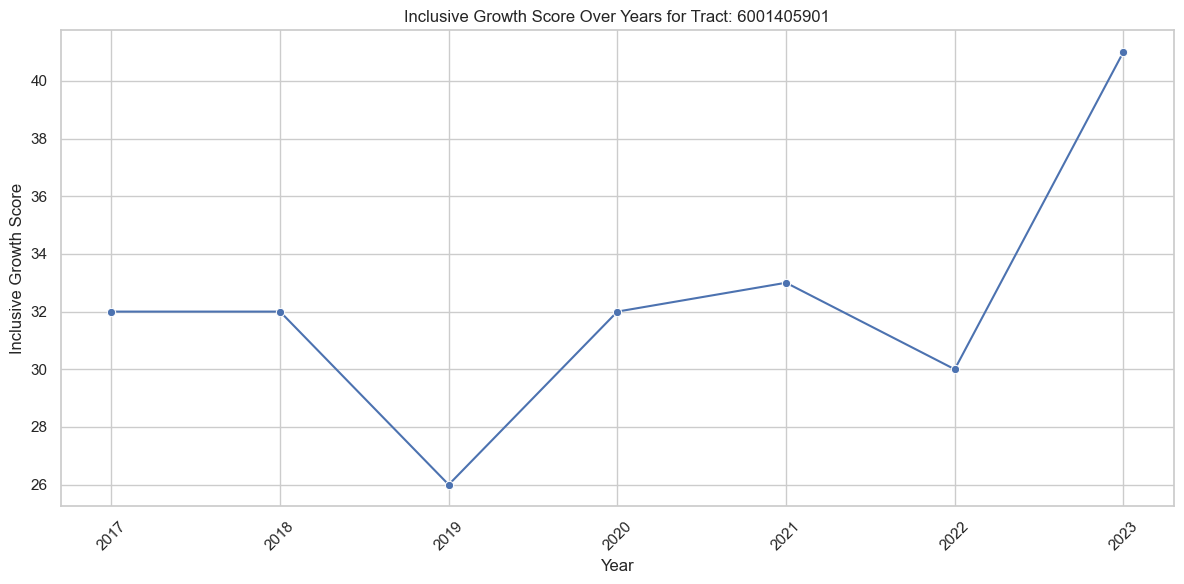

In [214]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = tracts[1]  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = comp_tracts_df[comp_tracts_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Create the line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tract_data, x='Year', y='Inclusive Growth Score', marker='o')

    # Adding title and labels
    plt.title(f'Inclusive Growth Score Over Years for Tract: {specific_tract}')
    plt.xlabel('Year')
    plt.ylabel('Inclusive Growth Score')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

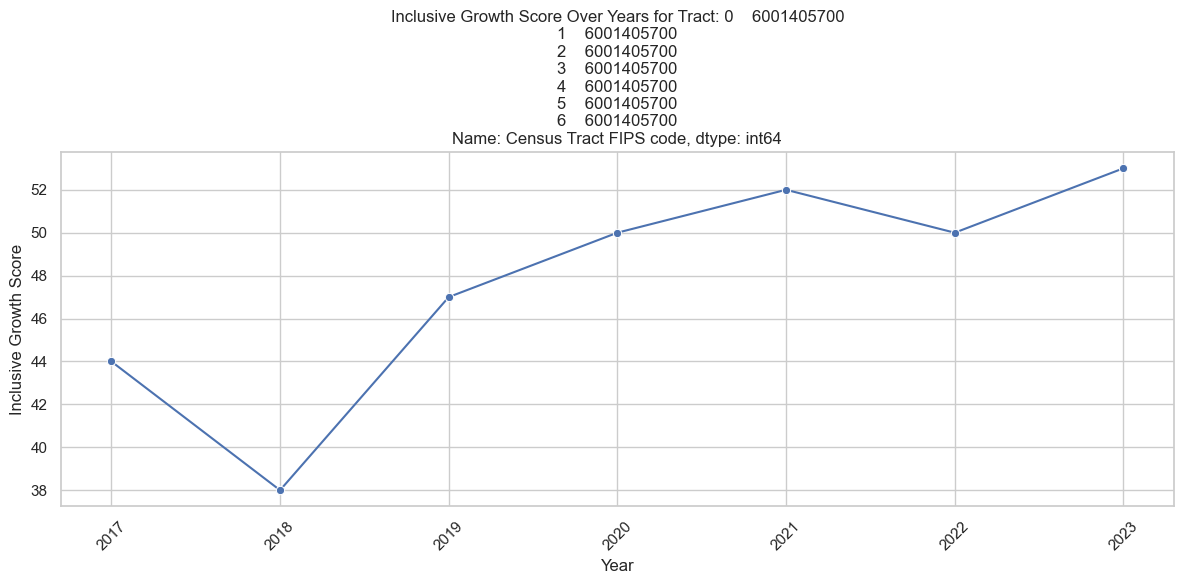

In [215]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = highland_park_df['Census Tract FIPS code']  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = highland_park_df[highland_park_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Create the line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tract_data, x='Year', y='Inclusive Growth Score', marker='o')

    # Adding title and labels
    plt.title(f'Inclusive Growth Score Over Years for Tract: {specific_tract}')
    plt.xlabel('Year')
    plt.ylabel('Inclusive Growth Score')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
comp_tracts_df = pd.read_csv("IGS_7_tracts.csv")

# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = tracts[0]  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = comp_tracts_df[comp_tracts_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Create the line plot
    plt.figure(figsize=(12, 6))

    # Plot Net Occupancy Score
    sns.lineplot(data=tract_data, x='Year', y='Net Occupancy Score', marker='o', label='Net Occupancy Score')
    
    # Plot Affordable Housing Score
    sns.lineplot(data=tract_data, x='Year', y='Affordable Housing Score', marker='o', label='Affordable Housing Score')

    # Adding title and labels
    plt.title(f'Comparison of Net Occupancy and Affordable Housing Scores Over Time for Tract: {specific_tract}')
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(title='Scores')

    # Show the plot
    plt.tight_layout()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'IGS_7_tracts.csv'

In [ ]:
df.pivot(index='Year', columns='Census Tract FIPS code', values='Inclusive Growth Score').plot(kind='bar', figsize=(10, 6))
plt.title('Scores by Census Tract for Each Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Census Tract')
plt.grid(axis='y')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
for tract in df['Census Tract FIPS code'].unique():
    plt.plot(df[df['Census Tract FIPS code'] == tract]['Year'], df[df['Census Tract FIPS code'] == tract]['Inclusive Growth Score'], marker='o', label=tract)
plt.title('Scores by Census Tract Over Years')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Census Tract')
plt.grid(True)
plt.show()
